In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
movie= pd.read_csv('/Users/adityaverma/Aditya/My Codes C/movie.csv')

# Display the first few rows of the dataset
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# import rating dataset
rating = pd.read_csv('/Users/adityaverma/Aditya/My Codes C/ratings.csv')

# columns
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [4]:
# drop genres column
movie.drop(['genres'],axis=1,inplace=True)

In [5]:
# using user id, movie id and rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


In [6]:
#merging
movie= pd.merge(movie,rating)

In [7]:
movie.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),2,5.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),8,5.0
3,1,Toy Story (1995),11,4.0
4,1,Toy Story (1995),14,4.0


In [8]:
movie.shape

(105034, 4)

In [9]:
movie= movie.iloc[:1000000]

In [10]:
movie.describe()

,movieId,userId,rating
count,105034.000000,105034.000000,105034.000000
mean,13039.426738,364.693613,3.516561
std,25421.798576,197.479026,1.045325
min,1.000000,1.000000,0.500000
25%,1073.000000,192.000000,3.000000
50%,2478.000000,383.000000,3.500000
75%,5956.000000,556.000000,4.000000
max,131258.000000,668.000000,5.000000


In [11]:
movie.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Fallen Angels (Duo luo tian shi) (1995)    5.0
Gunfighter, The (1950)                     5.0
My Sassy Girl (2008)                       5.0
Roots (1977)                               5.0
Swan, The (1956)                           5.0
                                          ... 
Bebe's Kids (1992)                         0.5
Deliver Us from Evil (2014)                0.5
Hercules in New York (1970)                0.5
Unreasonable Man, An (2006)                0.5
You Got Served (2004)                      0.5
Name: rating, Length: 10191, dtype: float64

In [12]:
movie.groupby("title").count()["rating"].sort_values(ascending=False)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
                                            ... 
Killer Is Loose, The (1956)                    1
Kill the Messenger (2014)                      1
Kill Me Again (1989)                           1
Kika (1993)                                    1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 10191, dtype: int64

In [13]:
ratings=pd.DataFrame(movie.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(movie.groupby("title").count()["rating"])
print(ratings.head())

                                         rating  number of ratings
title                                                             
'71 (2014)                                3.500                  1
'Hellboy': The Seeds of Creation (2004)   3.000                  1
'Round Midnight (1986)                    2.500                  1
'Til There Was You (1997)                 4.000                  3
'burbs, The (1989)                        3.125                 20


In [14]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
Fallen Angels (Duo luo tian shi) (1995),5.0,1
"Gunfighter, The (1950)",5.0,1
My Sassy Girl (2008),5.0,1
Roots (1977),5.0,1
"Swan, The (1956)",5.0,1
...,...,...
Bebe's Kids (1992),0.5,1
Deliver Us from Evil (2014),0.5,1
Hercules in New York (1970),0.5,1


In [15]:
ratings.describe()

,rating,number of ratings
count,10191.000000,10191.000000
mean,3.174569,10.306545
std,0.816513,22.960696
min,0.500000,1.000000
25%,2.750000,1.000000
50%,3.267857,3.000000
75%,3.750000,8.000000
max,5.000000,325.000000


<function matplotlib.pyplot.show(close=None, block=None)>

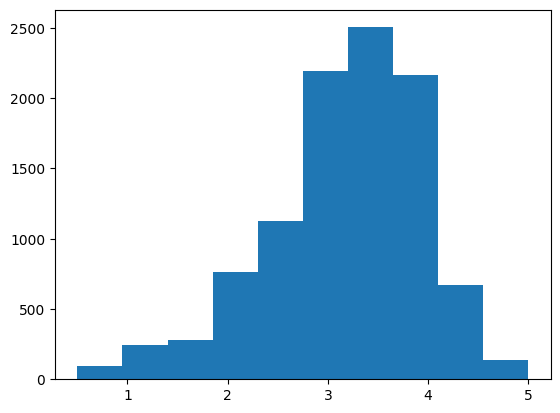

In [16]:
plt.hist(ratings['rating'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

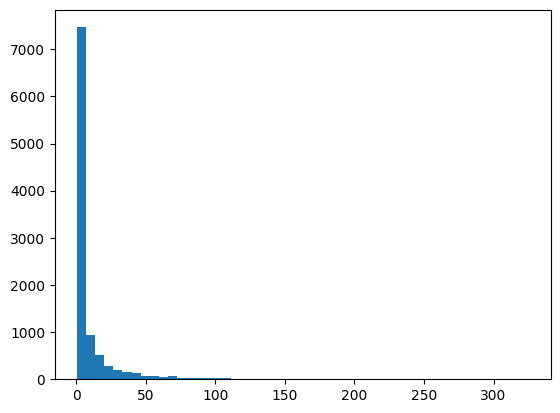

In [17]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show

In [18]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pt_table = movie.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pt_table.head(5)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def recommend_movie(movie):
    movie_watched = pt_table[movie]
    similarity_with_other_movies = pt_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [21]:
recommend_movie('Braveheart (1995)')

title
Rose, The (1979)             1.0
Torch Song Trilogy (1988)    1.0
Once Bitten (1985)           1.0
Just Like Heaven (2005)      1.0
Just Married (2003)          1.0
dtype: float64

In [22]:
recommend_movie('Addams Family Values (1993)')

title
Head On (1998)                                                         1.0
American Pie Presents: Band Camp (American Pie 4: Band Camp) (2005)    1.0
Psycho Beach Party (2000)                                              1.0
Mirror Has Two Faces, The (1996)                                       1.0
Little Big League (1994)                                               1.0
dtype: float64